# Tugas 5 (Clustering Iris Data Using K Mean Clustering)

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')

In [4]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#finding different class labels 
np.unique(df['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.shape

(150, 5)

In [7]:
iris_data=load_iris()   

In [8]:
x = df.iloc[:, :-1].values
y = df.iloc[:,   -1].values

In [9]:
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe


In [10]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier

In [11]:
y_kmeans = kmeans.fit_predict(x)

In [12]:
print(kmeans.cluster_centers_) #display cluster centers

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [13]:
X=df.iloc[:,0:4].values
from sklearn.decomposition import PCA
pca = PCA()
# pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [14]:
X_new

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

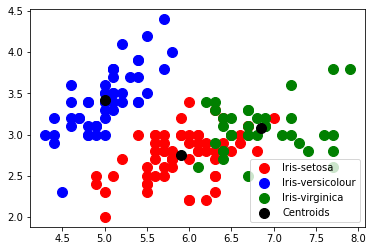

In [15]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()


In [16]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [17]:
#finding different class labels 
np.unique(df['class'])

array([0, 1, 2])

In [18]:
#converting dataframe to np array 
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [19]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

In [20]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

0.8928571428571428
5.263157894736842


In [21]:
#classification report for training set 
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       0.02      0.08      0.03        12

    accuracy                           0.01       112
   macro avg       0.01      0.03      0.01       112
weighted avg       0.00      0.01      0.00       112

